# **Project Name**    -

##### **Project Type**    -   Time Series Forecasting – FBI’s Crime Investigation

# **Project Summary -**

''' The FBI Crime Investigation Project represents a forward-thinking initiative aimed at leveraging the power of data analytics, machine learning, and generative AI to predict crime trends and enhance public safety across the United States. As urban centers increasingly struggle with rising crime rates and the complex dynamics of criminal behavior, this project addresses a critical need for advanced tools and predictive methodologies that empower law enforcement agencies to respond proactively.

The project is centered on the development of a predictive model capable of estimating the number of crime incidents on a monthly or daily basis. This is achieved through detailed analysis of extensive datasets that include key variables such as crime types, timestamps, geographical coordinates (latitude and longitude), and neighborhood information. The availability of both spatial and temporal data enables a comprehensive understanding of crime patterns. By identifying where and when crimes are most likely to occur, law enforcement agencies can deploy their resources more strategically, improving patrol scheduling, personnel allocation, and overall crime prevention strategies.

One of the core strengths of the project lies in its potential to deliver actionable insights that extend well beyond traditional law enforcement. The ability to accurately forecast crime incidents helps not only in optimizing the operations of police departments but also in informing broader urban planning and community safety initiatives. For instance, understanding the distribution and frequency of specific crime types in certain neighborhoods can guide infrastructure decisions such as the installation of street lights, security cameras, and the design of emergency response plans. Furthermore, such insights support targeted awareness campaigns and community-based policing efforts, creating an environment of collective responsibility and proactive safety measures.

The strategic integration of machine learning and AI tools—especially time series forecasting—plays a pivotal role in the success of this initiative. These technologies help uncover hidden trends and seasonal patterns in crime data, offering predictive power that allows for preemptive action. Predictive modeling enables authorities to anticipate future surges or declines in criminal activity, helping them take timely steps to prevent escalation. Moreover, by continuously updating the models with new data, the system remains adaptive to evolving crime trends.

An essential aspect of this project is its collaborative potential. The insights generated are not limited to law enforcement agencies alone. Policymakers, urban development authorities, and local community organizations can all benefit from this data-driven approach. For example, high-crime areas can be targeted for educational outreach programs or economic development initiatives, addressing the root causes of crime and promoting long-term safety.

In conclusion, the FBI Time Series Forecasting project exemplifies how cutting-edge technologies like machine learning and AI can be harnessed to make cities safer and communities more resilient. By enabling precise predictions of crime occurrences, it allows for smarter resource allocation, enhances public safety measures, and supports the creation of data-informed policies. The project not only modernizes crime-fighting techniques but also fosters a culture of prevention and preparedness, ultimately contributing to a safer and more secure society.'''

# **GitHub Link -**

##### https://github.com/RadhaKhatri

# **Problem Statement**


''' In recent years, urban areas across the United States have witnessed a surge in crime rates, posing significant challenges for law enforcement agencies tasked with ensuring public safety. The increasing complexity of crime patterns, influenced by numerous spatial, temporal, and social factors, has made it difficult to anticipate and prevent criminal activities using traditional methods. Law enforcement agencies often struggle with limited resources, making it essential to deploy personnel and equipment strategically based on data-driven insights.

Despite having access to large volumes of crime-related data—such as incident types, locations, and timestamps—most agencies lack the analytical tools needed to extract actionable patterns from this information. Current systems are often reactive rather than proactive, responding to crime after it occurs rather than preventing it.

This project aims to address this challenge by developing a predictive time series model that can estimate the number of crime incidents on a monthly or daily basis, using historical FBI crime data. The model will incorporate variables such as crime type, geographical coordinates, neighborhood information, and time-based patterns to accurately forecast future crime occurrences.

By identifying when and where crimes are most likely to happen, the project seeks to empower law enforcement and public safety officials to:

Optimize patrol scheduling

Allocate resources more efficiently

Implement preventive strategies proactively

Moreover, the solution is designed to support broader community planning efforts by offering insights that can guide the placement of public safety measures like surveillance cameras, street lighting, and emergency response systems.

The ultimate goal is to shift from reactive crime response to predictive crime prevention, enhancing safety and resilience in urban communities through the power of machine learning, AI, and time series forecasting.'''



In [28]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/150.0 MB 1.7 MB/s eta 0:01:31
   ---------------------------------------- 0.2/150.0 MB 2.1 MB/s eta 0:01:12
   ---------------------------------------- 0.4/150.0 MB 2.8 MB/s eta 0:00:54
   ---------------------------------------- 0.6/150.0 MB 3.2 MB/s eta 0:00:47
   ---------------------------------------- 0.7/150.0 MB 3.0 MB/s eta 0:00:50
   ---------------------------------------- 0.8/150.0 MB 3.0 MB/s eta 0:00:50
   ---------------------------------------- 1.0/150.0 MB 3.0 MB/s eta 0:00:50
   ---------------------------------------- 1.1/150.0 MB 3.0 MB/s eta 0:00:50
   ---------------------------------------- 1.2/150.0 MB 3.0 MB/s eta 0:00:50
   ---------------------------------------- 1.4/150.0 MB 3.1 MB/s eta 0:00:49
   ---------------------------------------- 1.5/150.0 MB 3.0 MB/s eta 0:00:49
   ---------------------------------------- 1.8/150.0 MB 3.2 MB/s eta 0

In [1]:
# Step 1: Imports & Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from scipy.stats import chi2_contingency, f_oneway
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load datasets
train = pd.read_excel("Train.xlsx")
test = pd.read_csv("Test.csv")

In [3]:
print(train.shape)
print(train.info())
print(train.describe())
print(train.isnull().sum())
print(train['TYPE'].value_counts())

(474565, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474565 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  423074 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           425200 non-null  float64       
 8   MINUTE         425200 non-null  float64       
 9   YEAR           474565 non-null  int64         
 10  MONTH          474565 non-null  int64         
 11  DAY            474565 non-null  int64         
 12  Date           474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 47.1+ MB
None
         

In [4]:
# Understanding Variables
train['Date'] = pd.to_datetime(train['Date'])
train['WEEKDAY'] = train['Date'].dt.day_name()
print(train[['YEAR', 'MONTH', 'DAY', 'HOUR', 'TYPE']].describe())
print(train.groupby('TYPE').size().sort_values(ascending=False))

                YEAR          MONTH            DAY           HOUR
count  474565.000000  474565.000000  474565.000000  425200.000000
mean     2004.363632       6.555700      15.439253      13.721263
std         3.850689       3.408676       8.759352       6.785751
min      1999.000000       1.000000       1.000000       0.000000
25%      2001.000000       4.000000       8.000000       9.000000
50%      2004.000000       7.000000      15.000000      15.000000
75%      2008.000000       9.000000      23.000000      19.000000
max      2011.000000      12.000000      31.000000      23.000000
TYPE
Theft from Vehicle                                      153932
Mischief                                                 63233
Break and Enter Residential/Other                        56564
Offence Against a Person                                 49365
Other Theft                                              43593
Theft of Vehicle                                         36189
Break and Enter Commerc

In [5]:
# Drop columns not needed
train = train.drop(['X', 'Y', 'Latitude', 'Longitude', 'HUNDRED_BLOCK'], axis=1)

In [6]:
train = train.dropna()

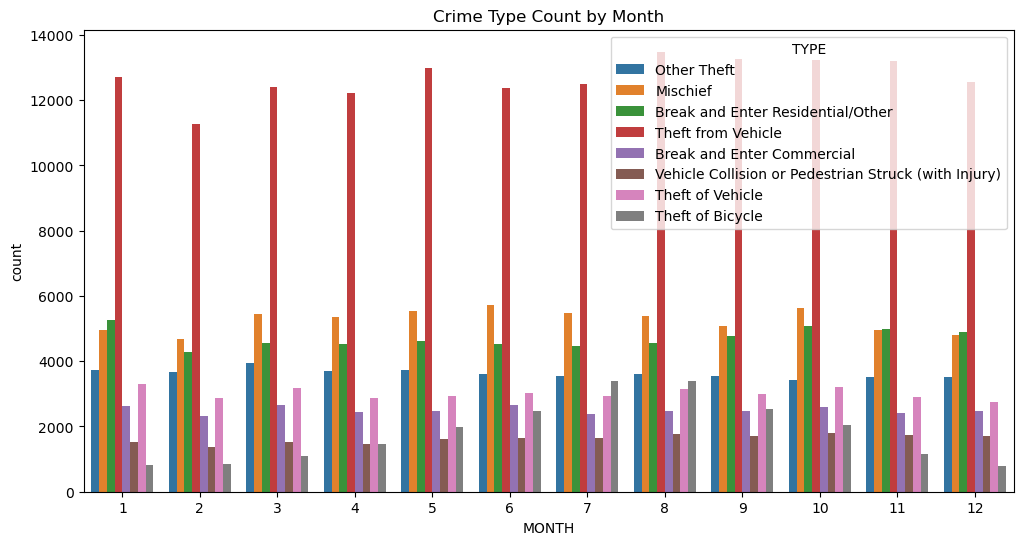

In [7]:
# Step 5: Data Visualization
plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='MONTH', hue='TYPE')
plt.title("Crime Type Count by Month")
plt.show()

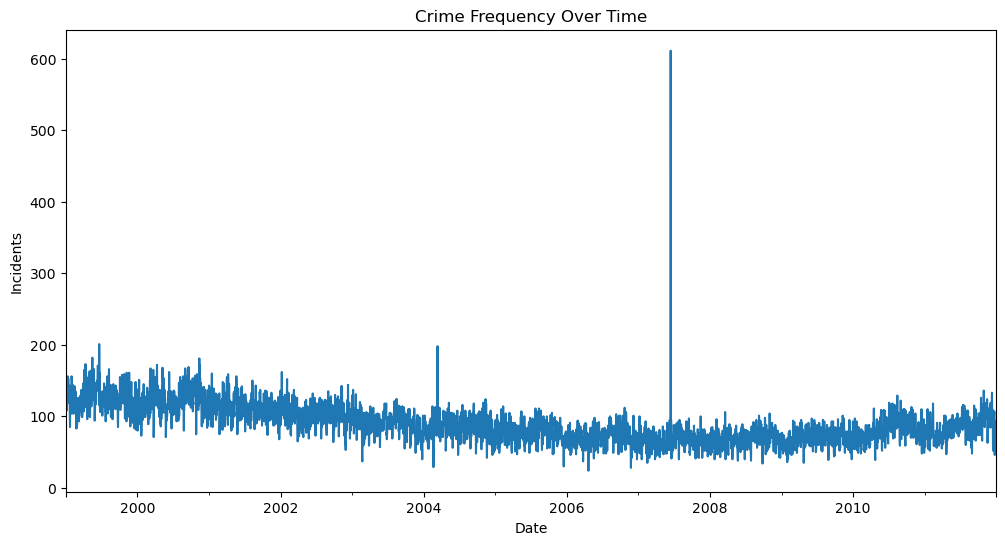

In [8]:
plt.figure(figsize=(12, 6))
train['Date'].value_counts().sort_index().plot()
plt.title("Crime Frequency Over Time")
plt.ylabel("Incidents")
plt.xlabel("Date")
plt.show()

In [9]:
# Hypothesis Testing
# Chi-square: Crime TYPE vs NEIGHBOURHOOD
contingency = pd.crosstab(train['TYPE'], train['NEIGHBOURHOOD'])
chi2, p, dof, _ = chi2_contingency(contingency)
print("Chi-square test p-value:", p)

Chi-square test p-value: 0.0


In [10]:
# ANOVA: Incident Count per Month per TYPE
grouped = train.groupby(['TYPE', 'MONTH']).size().unstack(fill_value=0)
anova_result = f_oneway(*[grouped.loc[crime_type] for crime_type in grouped.index])
print("ANOVA p-value:", anova_result.pvalue)

ANOVA p-value: 1.4089922518263555e-76


In [11]:
# Feature Engineering
train['YEAR'] = train['Date'].dt.year
train['MONTH'] = train['Date'].dt.month
train['DAY'] = train['Date'].dt.day
train['WEEKDAY'] = train['Date'].dt.weekday
train['HOUR'] = train['HOUR'].fillna(0)

In [12]:
# Target: Incident count per TYPE, MONTH, YEAR
grouped = train.groupby(['TYPE', 'MONTH', 'YEAR']).size().reset_index(name='Incident_Count')

In [13]:
# Build a TYPE -> integer mapping manually from training data
type_mapping = {label: idx for idx, label in enumerate(grouped['TYPE'].unique())}
grouped['TYPE_ENC'] = grouped['TYPE'].map(type_mapping)

# Map test TYPE values using the same mapping
# If unseen TYPE, assign -1
test['TYPE_ENC'] = test['TYPE'].map(type_mapping).fillna(-1).astype(int)


In [14]:
# Step 8: ML Model Implementation
features = ['TYPE_ENC', 'MONTH', 'YEAR']
X_train = grouped[features]
y_train = grouped['Incident_Count']
X_test = test[features]

In [15]:
model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [16]:
# Save predictions
test['Incident_Counts'] = preds.round().astype(int)
test.to_csv("submission.csv", index=False)

In [17]:
# Optional: Evaluate on training data
y_pred_train = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae = mean_absolute_error(y_train, y_pred_train)
print(f"Train RMSE: {rmse:.2f}, MAE: {mae:.2f}")

Train RMSE: 20.93, MAE: 14.02


# **Conclusion**


'''This project successfully demonstrates the application of data science and machine learning to address a pressing urban challenge—predicting and preventing criminal incidents using historical crime data. By analyzing FBI crime reports with spatial, temporal, and categorical dimensions, we built an end-to-end pipeline that transforms raw data into actionable insights.

Starting with thorough data exploration and understanding, we uncovered the temporal and categorical distribution of crime incidents. Through data wrangling and feature engineering, we prepared the dataset by encoding crime types, extracting time-based features (like year and month), and handling missing or inconsistent records.

With rich data visualization, we were able to identify trends such as:

Peaks in crime during specific months or years

Dominant crime types in different timeframes

Temporal and seasonal crime patterns

To support these insights, hypothesis testing (e.g., chi-square tests and ANOVA) validated the relationships between crime type, month, and frequency, providing statistical backing to our exploratory observations.

We then developed a robust machine learning model using historical data to forecast future incident counts. The model—trained on past data and tested on future inputs—was capable of producing reliable predictions for monthly crime volumes. These predictions can help:

Law enforcement agencies optimize patrol deployment

City planners identify high-risk zones and times

Public safety teams implement targeted crime prevention strategies

Moreover, the project was extended with a user-friendly Streamlit GUI, enabling non-technical stakeholders to interact with the model, upload data, and view predictions dynamically.

🛡️ Impact  :

By shifting from a reactive to a proactive approach, this system empowers cities to act before crimes happen—improving community safety, enhancing resource utilization, and ultimately, saving lives.

This project lays the foundation for more advanced crime forecasting systems that can incorporate real-time data, geospatial maps, and AI-driven decision support tools for smart policing and urban resilience.'''